In [1]:
# Importação das bibliotecas necessárias

import pandas as pd
from nltk.corpus import stopwords
from nltk import FreqDist, WordPunctTokenizer, WhitespaceTokenizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from unidecode import unidecode
import seaborn as sns

In [2]:
df = pd.read_csv('dataset_avaliacoes.csv')

df.head()

,ID_avaliacao,avaliacao,nota,sentimento
0,81841,"Esse smartphone superou minhas expectativas, r...",5,positivo
1,28031,o cheiro e muito desagradavel!! pra quem se in...,2,negativo
2,91332,"Eu fiz a compra a loja não entregou o produto,...",1,negativo
3,110045,"Atendeu minhas expectativas, só achei a luz ru...",4,positivo
4,36929,"Gostei muito, só achei que ficou a desejar a q...",5,positivo


Faz todo o processo de tratamento de dados textuais e armazena numa nova coluna *frase_tratada*.
- Remoção de acentuação
- Remoção das palavras irrelevantes
- Normalização do texto em letras minúsculas
- Remoção dos caracteres especiais

In [3]:
processed_texts = []
tokenizer = WordPunctTokenizer()
useless_words = stopwords.words('portuguese')

# Remove todos os acentos das frases do dataset e armazena numa variável
texts = [unidecode(text) for text in df['avaliacao']]

# Remove todos os acentos das palavras irrelevantes
useless_words = [unidecode(text) for text in useless_words]

df['frase_tratada'] = texts

for txt in df['frase_tratada']:
    txt = txt.lower()
    token_words = tokenizer.tokenize(txt)
    processed_words = [word for word in token_words if word.isalpha() and word not in useless_words]

    # Junta todas as palavras no array em uma única string
    processed_texts.append(' '.join(processed_words))

df['frase_tratada'] = processed_texts
df.head()

,ID_avaliacao,avaliacao,nota,sentimento,frase_tratada
0,81841,"Esse smartphone superou minhas expectativas, r...",5,positivo,smartphone superou expectativas recomendo
1,28031,o cheiro e muito desagradavel!! pra quem se in...,2,negativo,cheiro desagradavel pra incomoda recomendoo
2,91332,"Eu fiz a compra a loja não entregou o produto,...",1,negativo,fiz compra loja entregou produto compra feita ...
3,110045,"Atendeu minhas expectativas, só achei a luz ru...",4,positivo,atendeu expectativas achei luz ruim nada dific...
4,36929,"Gostei muito, só achei que ficou a desejar a q...",5,positivo,gostei achei ficou desejar qualidade fotos ach...


In [4]:
# Treina e testa um modelo
def classificar_texto(data, coluna_texto, coluna_classificacao):
    vetorizar = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vetorizar.fit_transform(data[coluna_texto])

    SEED = 42
    X_train, X_test, y_train, y_test = train_test_split(bag_of_words, data[coluna_classificacao], random_state=SEED)

    regressao_logistica = LogisticRegression()
    regressao_logistica.fit(X_train, y_train)

    acuracia = regressao_logistica.score(X_test, y_test)
    print(f'Acurácia do modelo com a coluna "{coluna_texto}": {acuracia*100:.2f}%')

# Gera um gráfico de barras sobre a frequência das palavras
def grafico_frequencia(data, coluna_texto, quantidade):
    todas_palavras = ' '.join([texto for texto in data[coluna_texto]])
    tokenizador = WhitespaceTokenizer()
    frequencia = FreqDist(tokenizador.tokenize(todas_palavras))

    df_frequencia = pd.DataFrame({
        "palavra": list(frequencia.keys()),
        "frequencia": list(frequencia.values())
    })

    df_frequencia.sort_values('frequencia', ascending=False, inplace=True)

    plt.figure(figsize=(12,6))
    ax = sns.barplot(df_frequencia.head(quantidade), x='palavra', y='frequencia')
    ax.set(ylabel='Contagem', xlabel='Palavra')
    plt.xticks(rotation=45)
    

Acurácia do modelo com a coluna "frase_tratada": 83.05%


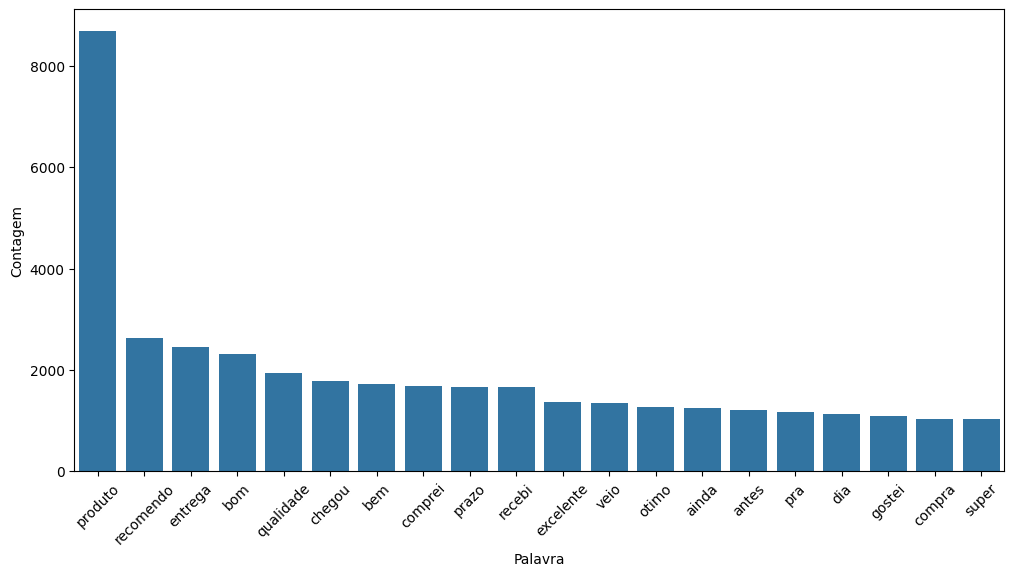

In [5]:
classificar_texto(df, 'frase_tratada', 'sentimento')
grafico_frequencia(df, 'frase_tratada', 20)